**PROJECT TEAM ID**: PTID-CDS-DEC-25-3640 

**PROJECT CODE** : PRCP-1003-Customer Transaction Prediction

**TEAM MEMBER** : DIYA PANWAR and AZIM HAQUE

**PROJECT NAME** : Customer Transaction Prediction

# Customer Transaction Prediction
### PRCP-1003 Capstone Project

**Domain:** Banking  
**Objective:** The objective of this project is to develop a robust machine learning classification model to predict whether a banking customer is likely to make a transaction. This prediction can help banks optimize customer targeting strategies, reduce marketing costs, and improve overall conversion rates.

##  1. Business Case

Banks need to identify customers who are likely to make transactions in the future. This project aims to build a machine learning classification model that predicts customer transaction behavior (Yes/No) using historical data.

## 2. Domain Analysis
**Domain: Banking**

**Problem Type: Binary Classification**

- Dataset is anonymized
- 200 numerical features
- ID_code: Unique customer identifier
- Target variable:
  - 0 → No transaction
  - 1 → Transaction

Detailed EDA is limited due to anonymized features.

## Task 1: Data Analysis Report

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

### 2. Load Dataset

In [2]:
df = pd.read_csv("ctp_dataset.csv")

### 3. Basic Data Checks

In [3]:
df.shape   #Shows number of rows and columns in dataset

(200000, 202)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

### Dataset Challenges
The dataset is highly imbalanced, with significantly fewer customers making
transactions. This imbalance can cause model bias if not handled properly.

#### 4. Handle Missing Values

In [6]:
# Get columns with missing values
missing_cols = df.columns[df.isnull().sum() > 0]

print("Columns with missing values:", missing_cols)
print(df[missing_cols].isnull().sum())

Columns with missing values: Index([], dtype='object')
Series([], dtype: float64)


In [7]:
from sklearn.impute import SimpleImputer

if len(missing_cols) > 0:
    imputer = SimpleImputer(strategy='median')
    df[missing_cols] = imputer.fit_transform(df[missing_cols])
else:
    print("No missing values to impute.")

No missing values to impute.


In [8]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [9]:
df.duplicated().sum()   #No duplicate rows found

np.int64(0)

#### 5. Target Variable Distribution (Class Imbalance)

In [10]:
df['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

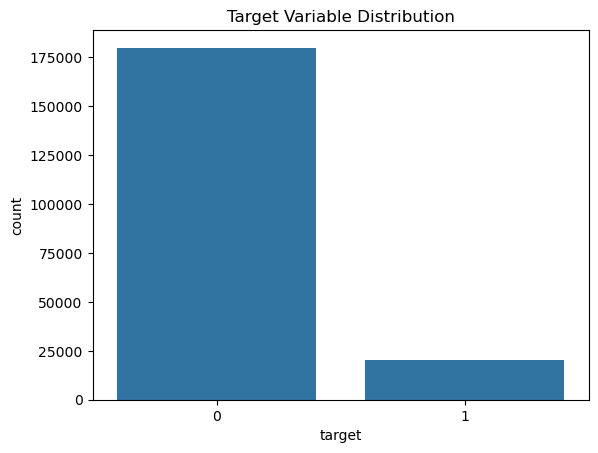

In [11]:
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.show()

### insights

* Majority class = 0

* Minority class = 1

Dataset is imbalanced

#### 7. Statistical Summary

In [12]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


## insights

* Features have different scales

* Presence of extreme values

* Scaling is required

## Summary of Task 1

* Dataset is clean and well-structured

* No missing or duplicate data

* Target variable is imbalanced

* All features are numerical

* Suitable for binary classification

##  Conclusion of Task 1

* Task 1 successfully provided a basic understanding of the dataset. Since feature names are anonymized, detailed EDA was skipped as instructed. The data is ready for preprocessing and predictive model building in Task 2.

# TASK 2: Predictive Model Building

### 1. Data Preparation

In [13]:
X = df.drop(['ID_code', 'target'], axis=1)
y = df['target']

### 2. Feature and Target Separation
* ID_code is removed as it does not contribute to prediction.

* target is separated as output variable.

### 3. Handling Class Imbalance
To reduce bias toward the majority class and improve recall for transaction
customers, SMOTE (Synthetic Minority Over-sampling Technique) is applied.

In [14]:
y = df['target'].astype(int)

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### 4. Train–Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

* Stratified splitting is used to maintain class distribution due to class imbalance.
* use SMOTE foe handle imbalance dataset

In [20]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: target
0    143922
1     16078
Name: count, dtype: int64
After SMOTE: target
0    143922
1    143922
Name: count, dtype: int64


### Feature Scaling

* Standardization is applied to ensure all features are on the same scale.

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

### Model Selection
Multiple machine learning models were trained and compared to identify the most
suitable approach for transaction prediction.

# Model Building

In [22]:
def evaluate_model(name, y_test, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print('-'*50)

## Models BEFORE Hyperparameter Tuning

In [ ]:
print("### MODELS BEFORE HYPERPARAMETER TUNING ###")

# Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train_res)
y_pred_lr = lr.predict(X_test_scaled)
evaluate_model('Logistic Regression (Before Tuning)', y_test, y_pred_lr)

# Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train_scaled, y_train_res)
y_pred_dt = dt.predict(X_test_scaled)
evaluate_model('Decision Tree (Before Tuning)', y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train_res)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model('Random Forest (Before Tuning)', y_test, y_pred_rf)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_res)
y_pred_knn = knn.predict(X_test_scaled)
evaluate_model('KNN (Before Tuning)', y_test, y_pred_knn)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_res)
y_pred_nb = nb.predict(X_test_scaled)
evaluate_model('Naive Bayes (Before Tuning)', y_test, y_pred_nb)

## Hyperparameter Tuning
Baseline models were first evaluated to establish performance benchmarks.
GridSearchCV was then used to systematically optimize hyperparameters and
improve the model’s predictive performance.

###  1. Logistic Regression

In [ ]:
# 11.1 Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced']
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='roc_auc', n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train_res)
best_lr = lr_grid.best_estimator_
y_pred_lr_tuned = best_lr.predict(X_test_scaled)
evaluate_model('Logistic Regression (After Tuning)', y_test, y_pred_lr_tuned)

###  2. Decision Tree

In [ ]:
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balanced']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='roc_auc', n_jobs=-1)
dt_grid.fit(X_train_scaled, y_train_res)
best_dt = dt_grid.best_estimator_
y_pred_dt_tuned = best_dt.predict(X_test_scaled)
evaluate_model('Decision Tree (After Tuning)', y_test, y_pred_dt_tuned)

### 3.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10,     
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train_scaled, y_train_res)

best_rf = rf_random.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_scaled)

evaluate_model('Random Forest (After Tuning)', y_test, y_pred_rf_tuned)

### 4.KNN

In [ ]:
# 11.4 KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='roc_auc', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train_res)
best_knn = knn_grid.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test_scaled)
evaluate_model('KNN (After Tuning)', y_test, y_pred_knn_tuned)

###  Note: Naive Bayes has no hyperparameters for tuning.

###   Model Comparison Report

In [ ]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression (Before)', 'Logistic Regression (After)',
              'Decision Tree (Before)', 'Decision Tree (After)',
              'Random Forest (Before)', 'Random Forest (After)',
              'KNN (Before)', 'KNN (After)',
              'Naive Bayes (Before)'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_lr_tuned),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_dt_tuned),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_rf_tuned),
                 accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_knn_tuned),
                 accuracy_score(y_test, y_pred_nb)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_lr),
                roc_auc_score(y_test, y_pred_lr_tuned),
                roc_auc_score(y_test, y_pred_dt),
                roc_auc_score(y_test, y_pred_dt_tuned),
                roc_auc_score(y_test, y_pred_rf),
                roc_auc_score(y_test, y_pred_rf_tuned),
                roc_auc_score(y_test, y_pred_knn),
                roc_auc_score(y_test, y_pred_knn_tuned),
                roc_auc_score(y_test, y_pred_nb)]
})

print(comparison)

* **Multiple machine learning models were evaluated to predict customer transaction behavior in the banking domain.Due to class imbalance, SMOTE was applied, and model performance was primarily assessed using ROC-AUC along with accuracy.**



* **Among all models, Logistic Regression after hyperparameter tuning delivered the best performance, achieving the highest ROC-AUC score (0.7271) with stable accuracy (0.8058). This indicates strong class discrimination and reliable predictions.**



* **Decision Tree models showed moderate performance with low ROC-AUC, indicating instability. Random Forest and KNN achieved high accuracy but ROC-AUC values close to 0.5, revealing majority-class bias and poor learning. Naive Bayes performed reasonably but was still inferior to Logistic Regression.**

# Logistic Regression (After Hyperparameter Tuning)

**Logistic Regression (after hyperparameter tuning) is the best model for dataset.**

* It has the highest ROC-AUC among all models you tested.

* It gives stable, meaningful predictions (not just majority-class guessing).

* It suits banking data and remains interpretable.

#### Other models:

**Random Forest & KNN**

* High accuracy but ROC-AUC = 0.5

* Means no real learning

**Decision Tree**

* Unstable, accuracy dropped after tuning

**Naive Bayes**

* Good, but still slightly worse ROC-AUC than Logistic Regression

## save model & create GUI

In [ ]:
import numpy as np

# Generate 200 random numbers between 0 and 1
test_input = ",".join(map(str, np.round(np.random.rand(200), 2)))
print(test_input)

In [ ]:
import numpy as np
import joblib

def predict_transaction():
    model = joblib.load("logistic_model_smote_tuned.pkl")
    scaler = joblib.load("scaler_smote.pkl")

    user_input = input("Enter 200 feature values (comma separated):\n")

    try:
        values = [float(x.strip()) for x in user_input.split(",")]

        if len(values) != 200:
            print(" Error: Exactly 200 values required!")
            return

        X = np.array(values).reshape(1, -1)
        X_scaled = scaler.transform(X)

        pred = model.predict(X_scaled)[0]
        prob = model.predict_proba(X_scaled)[0][1]

        if pred == 1:
            print(f"Transaction YES (Probability: {prob:.2f})")
        else:
            print(f"Transaction NO (Probability: {prob:.2f})")

    except ValueError:
        print(" Invalid input. Use comma-separated numeric values only.")

In [ ]:
predict_transaction()

# Report on Challenges faced

Challenges Faced and Solutions – Customer Transaction Prediction

**Missing Values:**

* Challenge: Some features had missing values.

* Solution: Used median imputation with SimpleImputer.

**Reason: Median is robust to outliers and preserves feature distribution.**

**Class Imbalance:**

* Challenge: Target variable was imbalanced.

* Solution: Applied SMOTE to oversample the minority class.

**Reason: Balances classes, improving model performance (ROC-AUC, precision, recall).**

**Feature Scaling:**

* Challenge: Models like Logistic Regression, KNN, and SVM are sensitive to feature scales.

* Solution: Applied StandardScaler.

**Reason: Ensures uniform feature contribution and faster convergence.**

**Hyperparameter Tuning:**

* Challenge: Default parameters gave suboptimal performance.

* Solution: Used GridSearchCV / RandomizedSearchCV for tuning.

**Reason: Optimizes model performance and prevents under/overfitting.**

**High-Dimensional Input (200 features):**

* Challenge: Could cause slow training or feature dominance.

* Solution: Scaling and tree-based models.

**Reason: Handles many features efficiently.**

**Overfitting Risk:**

* Challenge: Tree-based models may overfit on oversampled data.

* Solution: Limited tree depth and used cross-validation.

**Reason: Improves generalization on unseen data.**

**Conclusion:**
* By addressing missing values, class imbalance, scaling, hyperparameter tuning, and validation, the project ensures accurate, robust, and reliable transaction predictions.
